## Python implementation of mixture of gamma distributions

Based on the mixtools R package implementation: https://github.com/cran/mixtools/blob/master/R/gammamixEM.R

The code for this implementation resides in: https://github.com/kundajelab/tfmodisco/blob/master/modisco/gammamix.py

In [1]:
from __future__ import division, print_function

In [2]:
import numpy as np
import scipy
from scipy.stats import gamma

def sample_from_gamma(n, a, scale):   
    return scipy.stats.gamma.ppf(np.random.random(n), a=a, scale=scale)

def generate_sim(mixing_proportion, n, a1, scale1, a2, scale2):

    all_vals1 = sample_from_gamma(int(n*mixing_proportion),
                                  a=a1, scale=scale1)
    all_vals2 = sample_from_gamma(int(n*(1-mixing_proportion)),
                                  a=a2, scale=scale2)

    all_vals = []
    all_vals.extend(all_vals1)
    all_vals.extend(all_vals2)
    return np.array(all_vals)

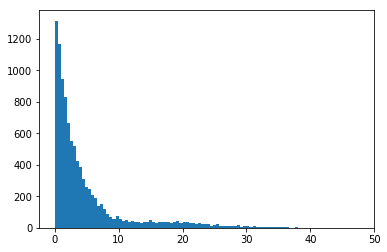

In [3]:
mixing_proportion = 0.9
n = 10000

a1 = 1
scale1 = 3
a2 = 10
scale2 = 2

all_vals = generate_sim(mixing_proportion=mixing_proportion,
                      n=n,
                      a1=a1,
                      scale1=scale1,
                      a2=a2,
                      scale2=scale2)

%matplotlib inline
from matplotlib import pyplot as plt
plt.hist(all_vals, bins=100)
plt.show()

In [4]:
import sys
sys.path.insert(-1,"../../modisco")
import gammamix
results = gammamix.gammamix_em(all_vals, mix_prop=np.array([0.9, 0.1]), verb=True)

initial vals: [0.9 0.1] [ 1.14324615 14.12754995] [0.38724116 0.68357074] 2
iteration = 1 log-lik diff = 17265.645343566764  log-lik = -25323.870949336233
iteration = 2 log-lik diff = 250.94932849791803  log-lik = -25072.921620838315
iteration = 3 log-lik diff = 74.81009978681686  log-lik = -24998.111521051498
iteration = 4 log-lik diff = 31.88321548893873  log-lik = -24966.22830556256
iteration = 5 log-lik diff = 15.917293833008443  log-lik = -24950.31101172955
iteration = 6 log-lik diff = 8.710679272691777  log-lik = -24941.60033245686
iteration = 7 log-lik diff = 5.063932313951227  log-lik = -24936.536400142908
iteration = 8 log-lik diff = 3.083465304636775  log-lik = -24933.45293483827
iteration = 9 log-lik diff = 1.9570550092466874  log-lik = -24931.495879829024
iteration = 10 log-lik diff = 1.2940679232415278  log-lik = -24930.201811905783
iteration = 11 log-lik diff = 0.8950480247294763  log-lik = -24929.306763881053
iteration = 12 log-lik diff = 0.6508786093509116  log-lik = -2

MixParams(mix_prop=array([0.9027165, 0.0972835]), alpha=array([ 0.97826373, 11.23563612]), invbeta=array([3.11624341, 1.80398973]), k=2)


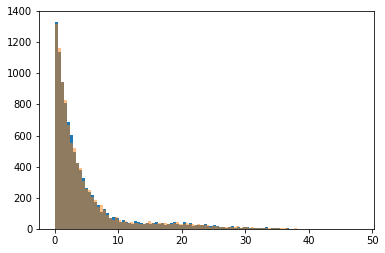

In [5]:
print(results.params)
plt.hist(generate_sim(mixing_proportion=results[0].mix_prop[0],
                      n=n,
                      a1=results[0].alpha[0],
                      scale1=(results[0].invbeta[0]),
                      a2=results[0].alpha[1],
                      scale2=(results[0].invbeta[1])), bins=100)
plt.hist(all_vals,alpha=0.5, bins=100)
plt.show()